# UPDATE DEPENDENCIES

In [197]:
# IRIS DATA SET
# https://archive.ics.uci.edu/dataset/53/iris

# XG BOOST DOCS
# https://docs.aws.amazon.com/sagemaker/latest/dg/xgboost_hyperparameters.html

In [198]:
!pip install --upgrade xgboost
!pip install --upgrade scipy
!pip install --upgrade scikit-learn
!pip install --upgrade matplotlib

# PREPARE DATA

In [199]:
import urllib.request
urllib.request.urlretrieve('https://archive.ics.uci.edu/static/public/53/iris.zip','data.zip')


('data.zip', <http.client.HTTPMessage at 0x7f4dfbfe0430>)

In [200]:
!unzip -o data.zip -d iris-data/

Archive:  data.zip
  inflating: iris-data/Index         
  inflating: iris-data/bezdekIris.data  
  inflating: iris-data/iris.data     
  inflating: iris-data/iris.names    


In [201]:
# read data
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('iris-data/iris.data', header=None)

# convert to numerical values
data[4] = data[4].replace('Iris-setosa',0)
data[4] = data[4].replace('Iris-virginica',1)
data[4] = data[4].replace('Iris-versicolor',2)
data = data[[4,0,1,2,3]]
print(data)

# Split the dataset into features and labels
X = data.drop(4, axis=1)
y = data[4]

print('FEATURES Only')
print(X)
print('LABELS Only')
print(y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Save training data to CSV format for SageMaker input
train_data = pd.concat([y_train,X_train], axis=1)
print(train_data)
train_data.to_csv('iris-data/train-data.csv', index=False, header=False)

valid_data = pd.concat([y_test,X_test], axis=1)
print(valid_data)
valid_data.to_csv('iris-data/valid-data.csv', header=False, index=False)


     4    0    1    2    3
0    0  5.1  3.5  1.4  0.2
1    0  4.9  3.0  1.4  0.2
2    0  4.7  3.2  1.3  0.2
3    0  4.6  3.1  1.5  0.2
4    0  5.0  3.6  1.4  0.2
..  ..  ...  ...  ...  ...
145  1  6.7  3.0  5.2  2.3
146  1  6.3  2.5  5.0  1.9
147  1  6.5  3.0  5.2  2.0
148  1  6.2  3.4  5.4  2.3
149  1  5.9  3.0  5.1  1.8

[150 rows x 5 columns]
FEATURES Only
       0    1    2    3
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
..   ...  ...  ...  ...
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]
LABELS Only
0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: 4, Length: 150, dtype: int64
     4    0    1    2    3
81   2  5.5  2.4  3.7  1.0
133  1  6.3  2.8  5.1  1.5
137  1  6.4  3.1  5.5  1.8
75   2  6.6  3.0  4.4  1.4
109  1  7.2  3.6  6.1  2.5
..  ..  ...  ...  

/tmp/ipykernel_8929/265310516.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[4] = data[4].replace('Iris-versicolor',2)


# MOVE DATA TO S3 BUCKET

In [202]:
import boto3
bucket_name = 'sagemaker-iris-nb'

key = 'data/train-data.csv'
url = 's3://{}/{}'.format(bucket_name, key)
boto3.Session().resource('s3').Bucket(bucket_name).Object(key).upload_file('iris-data/train-data.csv')


key = 'data/valid-data.csv'
url = 's3://{}/{}'.format(bucket_name, key)
boto3.Session().resource('s3').Bucket(bucket_name).Object(key).upload_file('iris-data/valid-data.csv')



INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole
INFO:botocore.credentials:Found credentials from IAM Role: BaseNotebookInstanceEc2InstanceRole


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


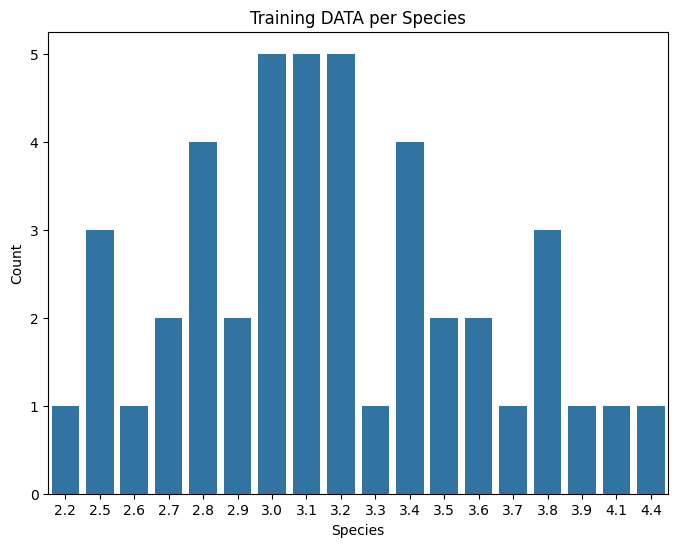

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


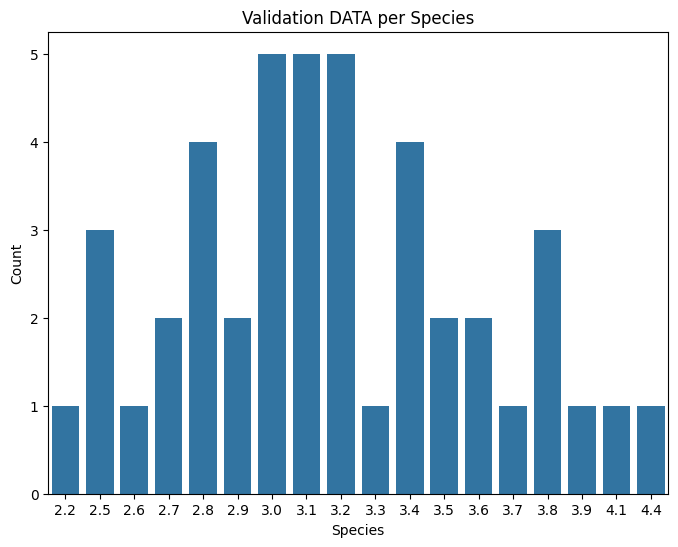

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt

train_data = 'iris-data/train-data.csv'
valid_data = 'iris-data/valid-data.csv'

data = pd.read_csv(train_data)
data.columns = ['species', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']
plt.figure(figsize=(8, 6))
sns.countplot(data=iris_df, x='species')
plt.title('Training DATA per Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

data = pd.read_csv(valid_data)
data.columns = ['species', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']
plt.figure(figsize=(8, 6))
sns.countplot(data=iris_df, x='species')
plt.title('Validation DATA per Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()



# CREATE MODEL

In [204]:
import sagemaker
from sagemaker.amazon.amazon_estimator import get_image_uri
from sagemaker import get_execution_role

s3_output_location = 's3://{}/{}'.format(bucket_name,'model/xgb_model')

xgb_model = sagemaker.estimator.Estimator(
    get_image_uri(boto3.Session().region_name,'xgboost'),
    get_execution_role(),
    train_instance_count = 1,
    train_instance_type = 'ml.m4.xlarge',
    train_volume_size = 5,
    output_path = s3_output_location
)

xgb_model.set_hyperparameters(
    max_depth = 5,
    eta=0.2,
    gamma=4,
    min_child_weight=6,
    silent = 0,
    objective='multi:softmax',
    num_class=3,
    num_round=2
)



See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


# TRAIN MODEL

In [205]:
train_data = 's3://{}/{}'.format(bucket_name,'data/train')
#valid_data = 's3://{}/{}'.format(bucket_name,'data/valid')

train_channel = sagemaker.session.s3_input(train_data, content_type='text/csv')
#valid_channel = sagemaker.session.s3_input(valid_data, content_type='text/csv')

data_channels = {'train': train_channel}

xgb_model.fit(inputs=data_channels)


See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
INFO:sagemaker:Creating training-job with name: xgboost-2024-10-20-15-42-30-508


2024-10-20 15:42:30 Starting - Starting the training job...
2024-10-20 15:43:04 Starting - Preparing the instances for training......
2024-10-20 15:43:54 Downloading - Downloading input data...
2024-10-20 15:44:19 Downloading - Downloading the training image......
2024-10-20 15:45:25 Training - Training image download completed. Training in progress..Arguments: train
[2024-10-20:15:45:35:INFO] Running standalone xgboost training.
[2024-10-20:15:45:35:INFO] Path /opt/ml/input/data/validation does not exist!
[2024-10-20:15:45:35:INFO] File size need to be processed in the node: 0.0mb. Available memory size in the node: 8459.29mb
[2024-10-20:15:45:35:INFO] Determined delimiter of CSV input is ','
[15:45:35] S3DistributionType set as FullyReplicated
[15:45:35] 105x4 matrix with 420 entries loaded from /opt/ml/input/data/train?format=csv&label_column=0&delimiter=,
[15:45:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[15:45:35] src/tr

# DEPLOY MODEL

In [206]:
xgb_predictor = xgb_model.deploy(
    initial_instance_count=1,
    instance_type='ml.m4.xlarge'
)

INFO:sagemaker:Creating model with name: xgboost-2024-10-20-15-46-18-288
INFO:sagemaker:Creating endpoint-config with name xgboost-2024-10-20-15-46-18-288
INFO:sagemaker:Creating endpoint with name xgboost-2024-10-20-15-46-18-288


------!

# VALIDATE MODEL

In [1]:
from io import StringIO
import numpy as np
from sklearn.metrics import accuracy_score

data = pd.read_csv('iris-data/valid-data.csv', header=None)

new_values = [
    [0, 5.0, 3.6, 1.4, 0.2],  # Iris-setosa
    [1, 6.0, 2.9, 4.5, 1.5],  # Iris-versicolor
    [2, 6.5, 3.2, 5.1, 2.0],  # Iris-virginica
    [2, 5.9, 3.0, 5.1, 1.8],  # Iris-virginica
    [0, 5.1, 3.5, 1.4, 0.3],  # Iris-setosa
    [1, 5.7, 2.8, 4.1, 1.3],  # Iris-versicolor
    [1, 6.7, 3.1, 4.7, 1.5],  # Iris-versicolor
    [2, 6.3, 3.3, 6.0, 2.5],  # Iris-virginica
    [0, 4.9, 3.1, 1.5, 0.1],  # Iris-setosa
    [2, 6.4, 2.7, 5.3, 1.9]   # Iris-virginica
]

new_rows = pd.DataFrame(new_values)
#data = pd.concat([data, new_rows], ignore_index=True)

X = data.drop(0, axis=1)
y = data[0]
#print(X)
#print(y)

X_csv = X.to_csv('iris-data/X-valid-data.csv', index=False, header=False)
y_csv = y.to_csv('iris-data/y-valid-data.csv', index=False, header=False)

# Use StringIO to convert the DataFrame to a CSV string in memory
csv_buffer = StringIO()
X.to_csv(csv_buffer, index=False, header=False)
X_csv_bytes = csv_buffer.getvalue().encode('utf-8')

y_test = np.array(y, dtype=float).astype(int)

# Make predictions - set content type via request headers
predictions = xgb_predictor.predict(X_csv_bytes, initial_args={'ContentType': 'text/csv'}).decode('utf-8').split(',')

# Convert predictions to a numpy array
y_pred = np.array(predictions, dtype=float).astype(int)

print("TEST: ", y_test, len(y_test))
print("PRED: ", y_pred, len(y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of model: {accuracy:.3f}")


NameError: name 'pd' is not defined

In [210]:
#xgb_predictor.delete_endpoint()